# COMP90051 Project 2

In [2]:
# Do not edit. These are the only imports permitted.
%matplotlib inline
import numpy as np
import matplotlib as plt
from abc import ABC, abstractmethod

## 1. Implement ε-Greedy and UCB

In [5]:
r = np.random.normal(0, 1, 10)

In [7]:
r

array([-1.40908429, -0.30577822, -0.51913837, -1.77118601,  0.73223957,
       -0.68932289,  0.96005131,  0.94696271,  0.20637319,  0.67901705])

In [6]:
np.argmax(r)

6

In [15]:
np.random.rand(10)

array([0.48706817, 0.2870919 , 0.85733662, 0.75174483, 0.78124952,
       0.11480086, 0.11466514, 0.26655409, 0.93027602, 0.0821777 ])

In [219]:
np.random.binomial(3,  [0.75174483,0.11])

array([3, 0])

In [13]:
b

array([0.02481084, 0.66531643, 0.03207746, 0.07299086, 0.11840091,
       0.89620611, 0.10164354, 0.24834361, 0.82187712, 0.34673209])

In [256]:
class MAB(ABC):
    """
    Abstract class that represents a multi-armed bandit (MAB)
    """
    def __init__(self,narms,epsilon,Q0,reward_distribution="Gaussian"):
        self.narms = narms
        self.epsilon = epsilon
        self.arm_values = np.random.normal(0,1,narms) if reward_distribution is "Gaussian" else np.random.rand(narms)
        self.best_action = np.argmax(self.arm_values)
        self.pulls = np.zeros(narms)
        self.est_values = np.empty(narms)
        self.est_values.fill(Q0)
        self.reward_distribution = reward_distribution
    def get_reward(self, action):
        if self.reward_distribution is "Gaussian":
            return self.get_Gaussian(action)
        return self.get_Bernoulli(action)
    
    def get_Gaussian(self, action):
        return np.random.normal(self.arm_values[action],1)
    
    def get_Bernoulli(self, action):
        return np.random.binomial(1,self.arm_values[action])
    
    @abstractmethod
    def play(self, tround, context):
        """
        Play a round
        
        Arguments
        =========
        tround : int
            positive integer identifying the round
        
        context : 1D float array, shape (self.ndims * self.narms), optional
            context given to the arms
        
        Returns
        =======
        arm : int
            the positive integer arm id for this round
        """
    
    @abstractmethod
    def update(self, arm, reward, context):
        """
        Updates the internal state of the MAB after a play
        
        Arguments
        =========
        arm : int
            a positive integer arm id in {1, ..., self.narms}
        
        reward : float
            reward received from arm
        
        context : 1D float array, shape (self.ndims * self.narms), optional
            context given to arms
        """

In [339]:
class EpsGreedy(MAB):
    """
    Epsilon-Greedy multi-armed bandit

    Arguments
    =========
    narms : int
        number of arms

    epsilon : float
        explore probability

    Q0 : float, optional
        initial value for the arms
    """
    
    def __init__(self, narms, epsilon, Q0=np.inf,reward_distribution="Gaussian"):
        super().__init__(narms,epsilon,Q0,reward_distribution)
        
#     def get_reward(self, action):
#         return
# #         return 1 if np.random.normal(0,1) > 0.2 else 0
# #         return np.random.normal(self.arm_values[action],1)
#         return self.arm_values[action] + np.random.normal(0,1)
    
    def play(self, tround, context=None):
        num_random = np.random.random()
        if self.epsilon > num_random:
            return np.random.randint(self.narms)
        else:
            return np.argmax(self.est_values)
            choice = np.random.choice(np.where(self.est_values == self.est_values.max())[0])
            return choice
        
        
    def update(self, arm, reward, context=None):
        self.pulls[arm] += 1
        self.est_values[arm] += (reward - self.est_values[arm])/self.pulls[arm]
    

In [362]:
pulls = 10000
narms = 10
eps = 1000

In [344]:
def experiment(eps,epsilon,Q0):
    rewards_all_eps = np.zeros(pulls)
    count_optimal = 0
    for ep in range(eps):
        reward_all = []
        reward_all_avg = np.zeros(pulls)
        actions = []
        bandit_ep0 = EpsGreedy(narms,epsilon,Q0)
        cumulative_reward = 0
        cumulative_reward_all = np.zeros(pulls)
        for i in range(pulls):
            action = bandit_ep0.play(i)
            actions.append(action)
            reward = bandit_ep0.get_reward(action)
            cumulative_reward += reward
            bandit_ep0.update(action,reward)
            reward_all.append(reward)
            prev_reward = reward_all_avg[i-1] if i > 0 else 0
            reward_all_avg[i] = prev_reward + (reward - prev_reward)/(i+1)
            cumulative_reward_all[i] = cumulative_reward/(i+1)
            count_optimal += 1 if bandit_ep0.best_action == action else 0
        rewards_all_eps += cumulative_reward_all
    return (rewards_all_eps/eps, count_optimal)


In [363]:
ep0,ep0_optimal_count = experiment(eps,0,0)
ep01,ep01_optimal_count = experiment(eps,0.1,0)
ep001,ep001_optimal_count = experiment(eps,0.01,0)

In [299]:
ep0

(array([0.487     , 0.507     , 0.52766667, 0.54225   , 0.5438    ,
        0.55183333, 0.55814286, 0.562875  , 0.56866667, 0.573     ,
        0.57627273, 0.578     , 0.58084615, 0.58171429, 0.58266667,
        0.5858125 , 0.58758824, 0.59016667, 0.593     , 0.595     ,
        0.59614286, 0.59813636, 0.60052174, 0.60270833, 0.60584   ,
        0.60742308, 0.6082963 , 0.60985714, 0.61089655, 0.61236667,
        0.61341935, 0.6141875 , 0.61627273, 0.61758824, 0.61931429,
        0.62058333, 0.62156757, 0.62221053, 0.62364103, 0.624375  ,
        0.62558537, 0.62680952, 0.62781395, 0.62879545, 0.62937778,
        0.62995652, 0.63121277, 0.63239583, 0.63393878, 0.63504   ,
        0.63611765, 0.63671154, 0.63792453, 0.63859259, 0.63945455,
        0.64025   , 0.64078947, 0.64151724, 0.64250847, 0.64306667,
        0.64357377, 0.64420968, 0.6445873 , 0.6450625 , 0.64567692,
        0.64571212, 0.6460597 , 0.64644118, 0.64707246, 0.64791429,
        0.64811268, 0.64851389, 0.64875342, 0.64

In [354]:
ep0_optimal_count,ep01_optimal_count,ep001_optimal_count

(1684694, 3998552, 3581235)

In [227]:
pyplot = plt.pyplot

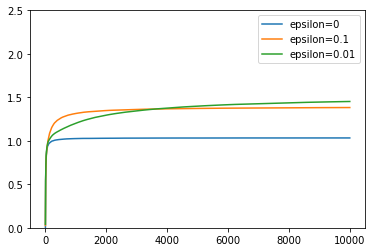

In [367]:
pyplot.plot(ep0,label="epsilon=0")
pyplot.plot(ep01,label="epsilon=0.1")
pyplot.plot(ep001,label="epsilon=0.01")
pyplot.ylim(0,2.5)
pyplot.legend()
pyplot.show()

In [364]:
ep0Q5,ep0Q5_optimal_count = experiment(eps,0,5)
ep01Q5,ep01Q5_optimal_count = experiment(eps,0.1,5)
ep001Q5,ep001Q5_optimal_count = experiment(eps,0.01,5)

In [365]:
ep0Q5_optimal_count,ep01Q5_optimal_count,ep001Q5_optimal_count

(7079348, 8430687, 8116947)

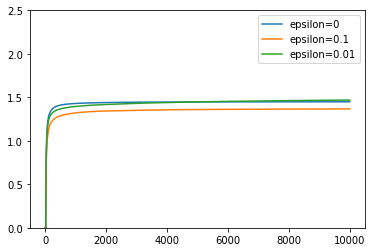

In [366]:
pyplot.plot(ep0Q5,label="epsilon=0")
pyplot.plot(ep01Q5,label="epsilon=0.1")
pyplot.plot(ep001Q5,label="epsilon=0.01")
pyplot.ylim(0,2.5)
pyplot.legend()
pyplot.show()

In [329]:
class Bandit:
    def __init__(self):
        self.arm_values = np.random.normal(0,1,10)
        self.K = np.zeros(10)
        self.est_values = np.zeros(10)
        self.best_action = np.argmax(self.arm_values)
        
    def get_reward(self,action):
        return np.random.normal(self.arm_values[action],1)
        noise = np.random.normal(self.arm_values[action],1)
        reward = self.arm_values[action] + noise
        return reward
    
    def choose_eps_greedy(self,epsilon):
        rand_num = np.random.random()
        if epsilon>rand_num:
            return np.random.randint(10)
        else:
            return np.argmax(self.est_values)
    
    def update_est(self,action,reward):
        self.K[action] += 1
        alpha = 1./self.K[action]
        self.est_values[action] += alpha * (reward - self.est_values[action])  # keeps running average of rewards

In [333]:
def experiment2(bandit,Npulls,epsilon):
    history = []
    for i in range(Npulls):
        action = bandit.choose_eps_greedy(epsilon)
        R = bandit.get_reward(action)
        bandit.update_est(action,R)
        history.append(R)
    return np.array(history)

In [331]:
Nexp = 500
Npulls = 3000

avg_outcome_eps0p0 = np.zeros(Npulls)
avg_outcome_eps0p01 = np.zeros(Npulls)
avg_outcome_eps0p1 = np.zeros(Npulls)

for i in range(Nexp):
    bandit = Bandit()
    avg_outcome_eps0p0 += experiment2(bandit,Npulls,0.0)
    bandit = Bandit()
    avg_outcome_eps0p01 += experiment2(bandit,Npulls,0.01)
    bandit = Bandit()
    avg_outcome_eps0p1 += experiment2(bandit,Npulls,0.1)

avg_outcome_eps0p0 /= np.float(Nexp)
avg_outcome_eps0p01 /= np.float(Nexp)
avg_outcome_eps0p1 /= np.float(Nexp)

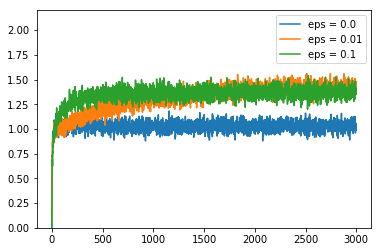

In [332]:
pyplot.plot(avg_outcome_eps0p0,label="eps = 0.0")
pyplot.plot(avg_outcome_eps0p01,label="eps = 0.01")
pyplot.plot(avg_outcome_eps0p1,label="eps = 0.1")
pyplot.ylim(0,2.2)
pyplot.legend()
pyplot.show()

In [ ]:
class UCB(MAB):
    """
    Upper Confidence Bound (UCB) multi-armed bandit

    Arguments
    =========
    narms : int
        number of arms

    rho : float
        positive real explore-exploit parameter

    Q0 : float, optional
        initial value for the arms
    """
    
    def __init__(self, narms, rho, Q0=np.inf):
        
    
    def play(self, tround, context=None):
        
        
    def update(self, arm, reward, context=None):
        
    

## 2. Off-Policy Evaluation

In [ ]:
def offlineEvaluate(mab, arms, rewards, contexts, nrounds=np.inf):
    """
    Offline evaluation of a multi-armed bandit
    
    Arguments
    =========
    mab : instance of MAB
    
    arms : 1D int array, shape (nevents,) 
        integer arm id for each event
    
    rewards : 1D float array, shape (nevents,)
        reward received for each event
    
    contexts : 2D float array, shape (nevents, mab.narms*nfeatures)
        contexts presented to the arms (stacked horizontally) 
        for each event.
        
    nrounds : int
        number of matching events to evaluate `mab` on.
    
    Returns
    =======
    out : 1D float array
        rewards for the matching events
    """
    

In [ ]:
mab = EpsGreedy(10, 0.05)
rewards = offlineEvaluate(mab, arms, rewards, contexts, 800)
print('EpsGreedy average reward', np.mean(rewards))

In [ ]:
mab = UCB(10, 1)
rewards = offlineEvaluate(mab, arms, rewards, contexts, 800)
print('UCB average reward', np.mean(rewards))

## 3. Contextual Bandits

In [ ]:
class LinUCB(MAB):
    """
    Contextual multi-armed bandit (LinUCB)

    Arguments
    =========
    narms : int
        number of arms

    ndims : int
        number of dimensions for each arm's context

    alpha : float
        positive real explore-exploit parameter
    """
    
    def __init__(self, narms, ndims, alpha):
        
        
    def play(self, tround, context):
        
    
    def update(self, arm, reward, context):
        
    

In [ ]:
mab = LinUCB(10, 10, 1)
rewards = offlineEvaluate(mab, arms, rewards, contexts, 800)
print('LinUCB average reward', np.mean(rewards))

## 4. Evaluation
### 4.A.

### 4.B.

## 5. KernelUCB

In [ ]:
# Do not edit. Special import for this section.
from sklearn.metrics.pairwise import rbf_kernel

In [ ]:
class KernelUCB(MAB):
    """
    Kernelised contextual multi-armed bandit (Kernelised LinUCB)
    
    Arguments
    =========
    narms : int
        number of arms

    ndims : int
        number of dimensions for each arm's context

    gamma : float
        positive real explore-exploit parameter
    
    eta : float
        positive real explore-exploit parameter
    
    kern : callable
        a kernel function from sklearn.metrics.pairwise
    """
    def __init__(self, narms, ndims, gamma, eta, kern):
        
    
    def play(self, tround, context):
        
    
    def update(self, arm, reward, context):
        
    